In [ ]:
import numpy as np
import pandas as pd
import datatable as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
pip install datatable

     |████████████████████████████████| 96.9 MB 46 kB/s 


In [42]:
data = pd.read_csv('student-mat.csv')
test = pd.read_csv('student-por.csv')

In [ ]:
data.shape
data.info

In [ ]:
#pd.set_option('display.max_columns', 120)
data.describe

In [93]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
G3_dist = data.G3.value_counts()
display(G3_dist)

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
4      1
20     1
Name: G3, dtype: int64

In [ ]:
data.G3

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

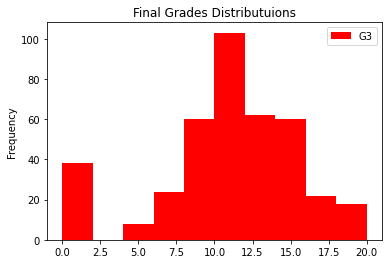

In [23]:
data.plot(y='G3', kind = 'hist', color='red', title='Final Grades Distributuions')

Distribution Analysis

In [36]:
num_cols = [i for i in data.columns if data[i].dtype in ['int64', 'float64']]
categorial_cols = [i for i in data.columns if data[i].dtype == 'object']
print(num_cols)

['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [43]:
cat_cols_test = [i for i in test.columns if test[i].dtype == 'object']

In [85]:
y = data.G3
y_test = test.G3
y_test.shape

(649,)

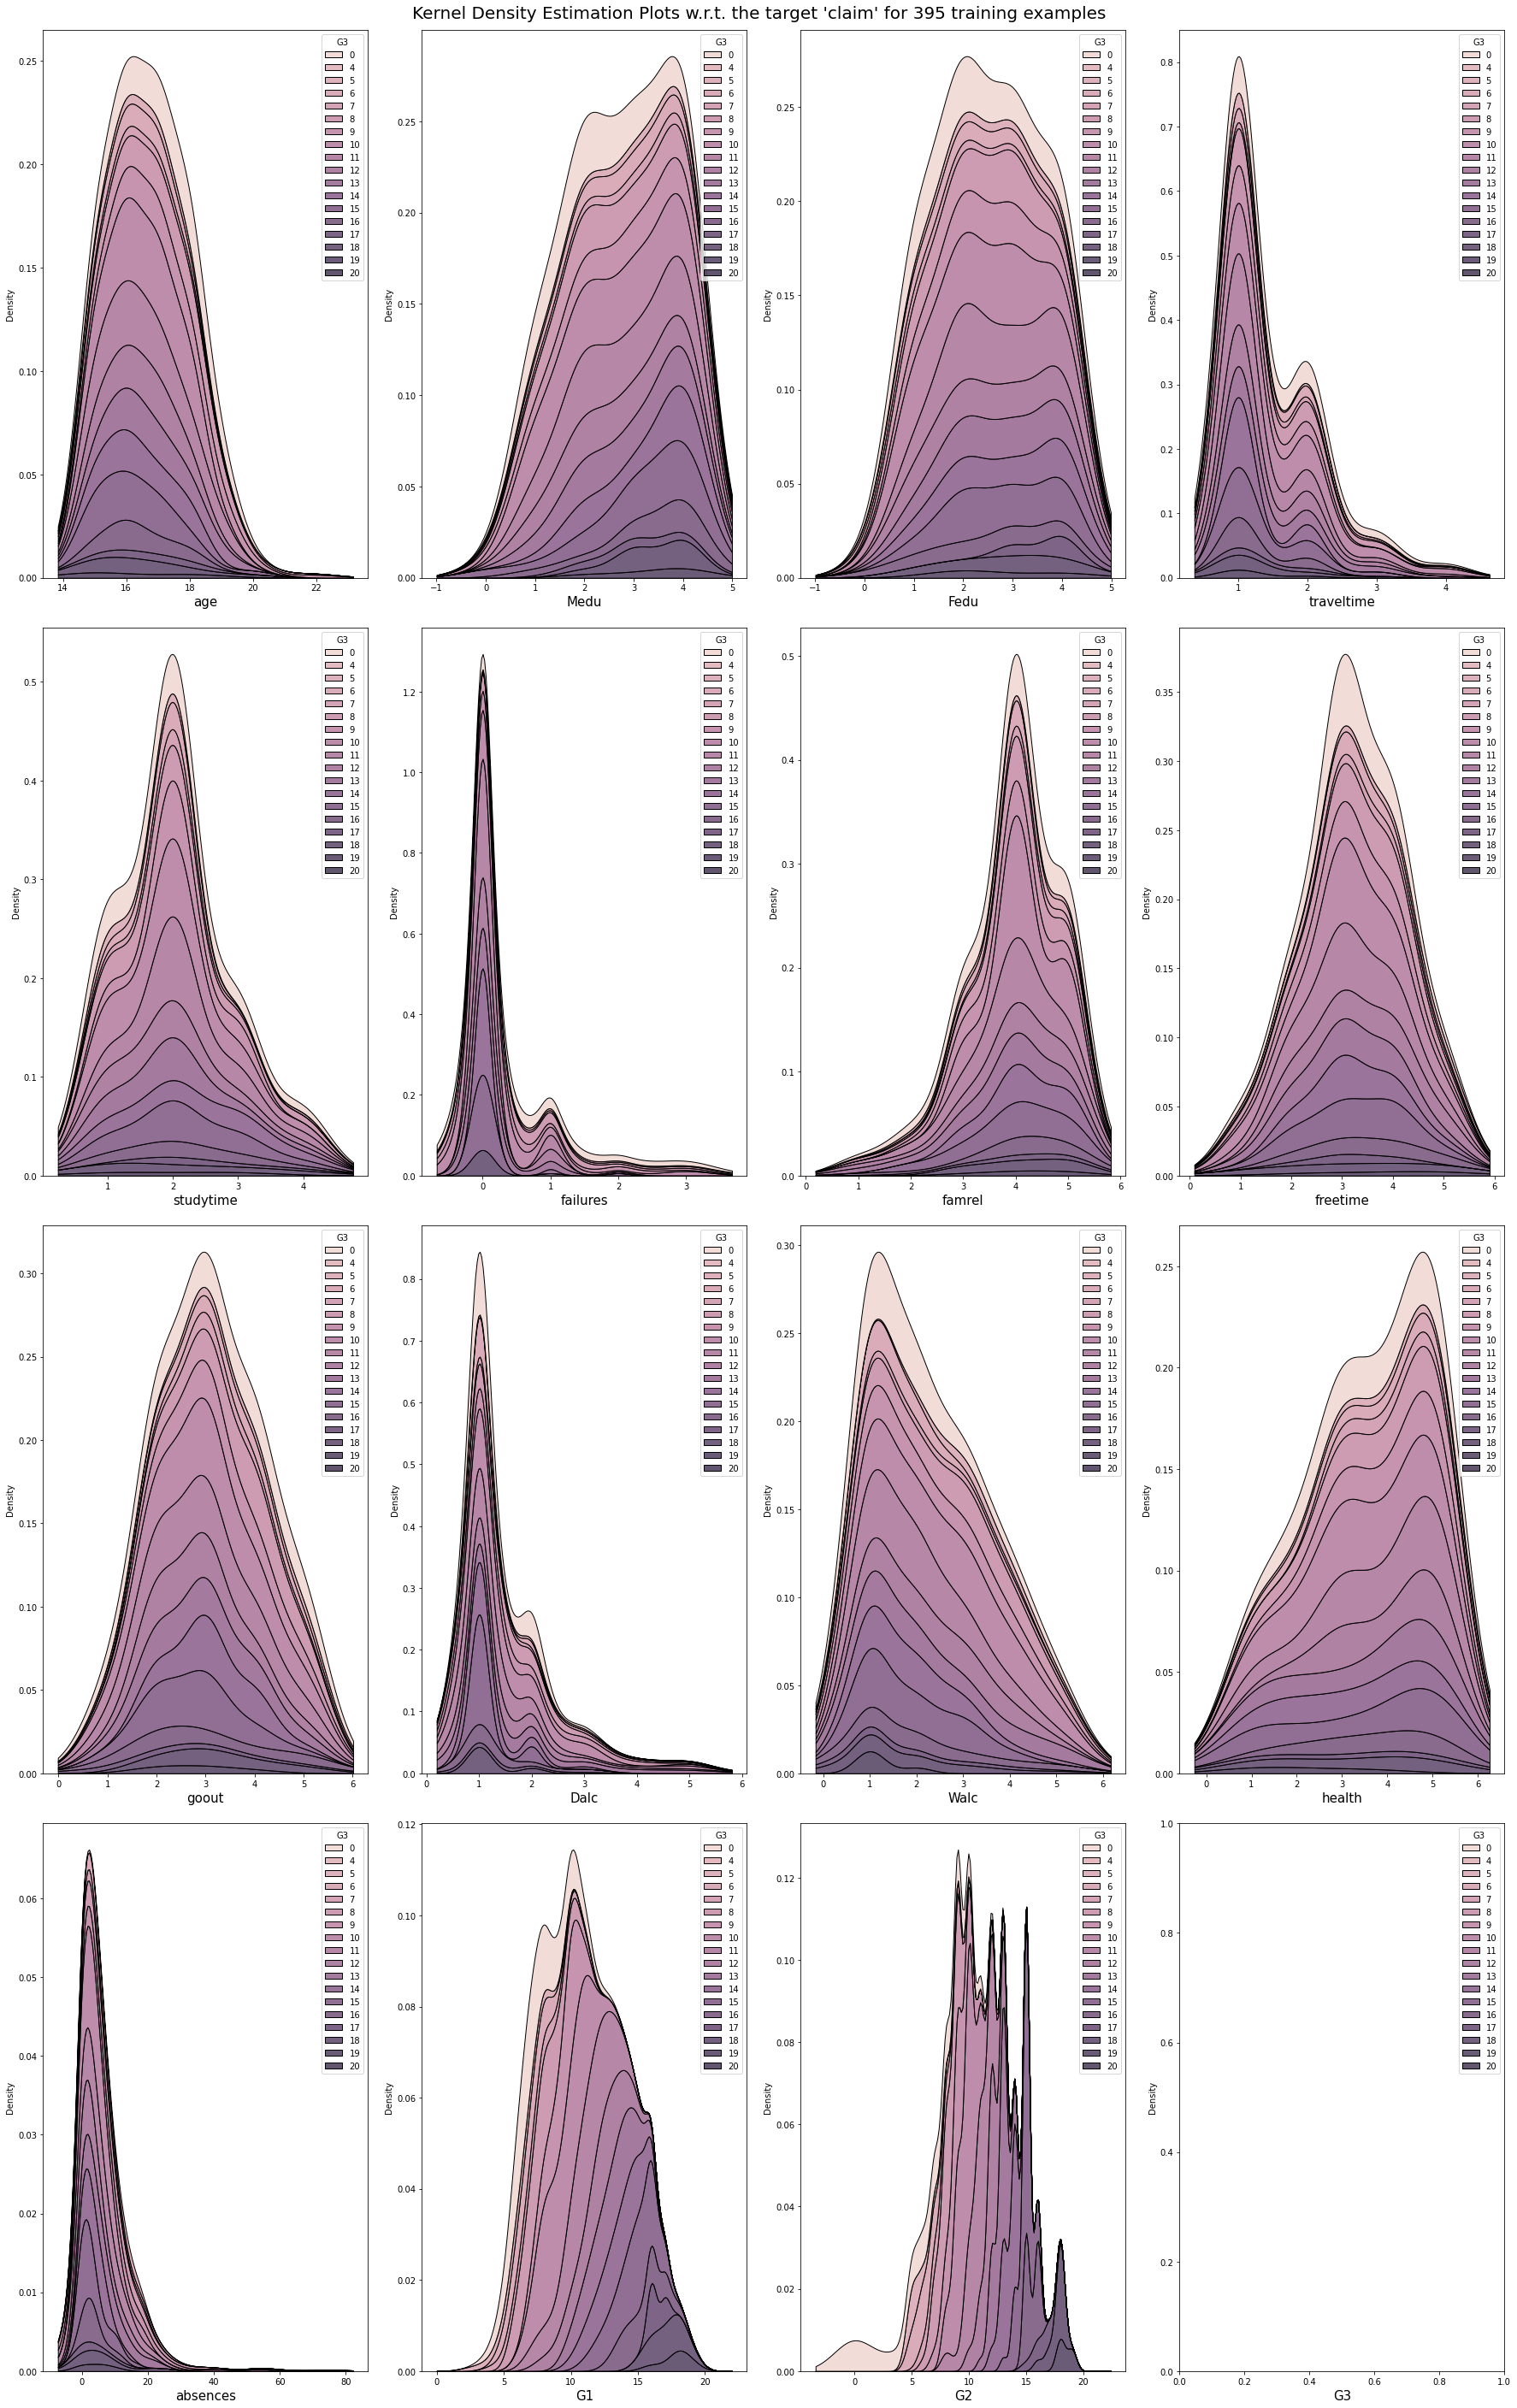

In [30]:
target = data.G3
c = 4
r = int(len(num_cols) / 4)
fig, ax = plt.subplots(nrows = r, ncols = c, figsize = (25,40))
i = 1
for col in num_cols:
    plt.subplot(r, c, i)
    ax = sns.kdeplot(data[col], hue = target, fill = True, multiple = 'stack')
    plt.xlabel(col, fontsize = 15)
    i = i + 1
    
fig.tight_layout(pad = 2.0)
fig.subplots_adjust(top = 0.97)
plt.suptitle("Kernel Density Estimation Plots w.r.t. the target 'G3' for {} training examples".format(data.shape[0]), fontsize = 20)
plt.show()

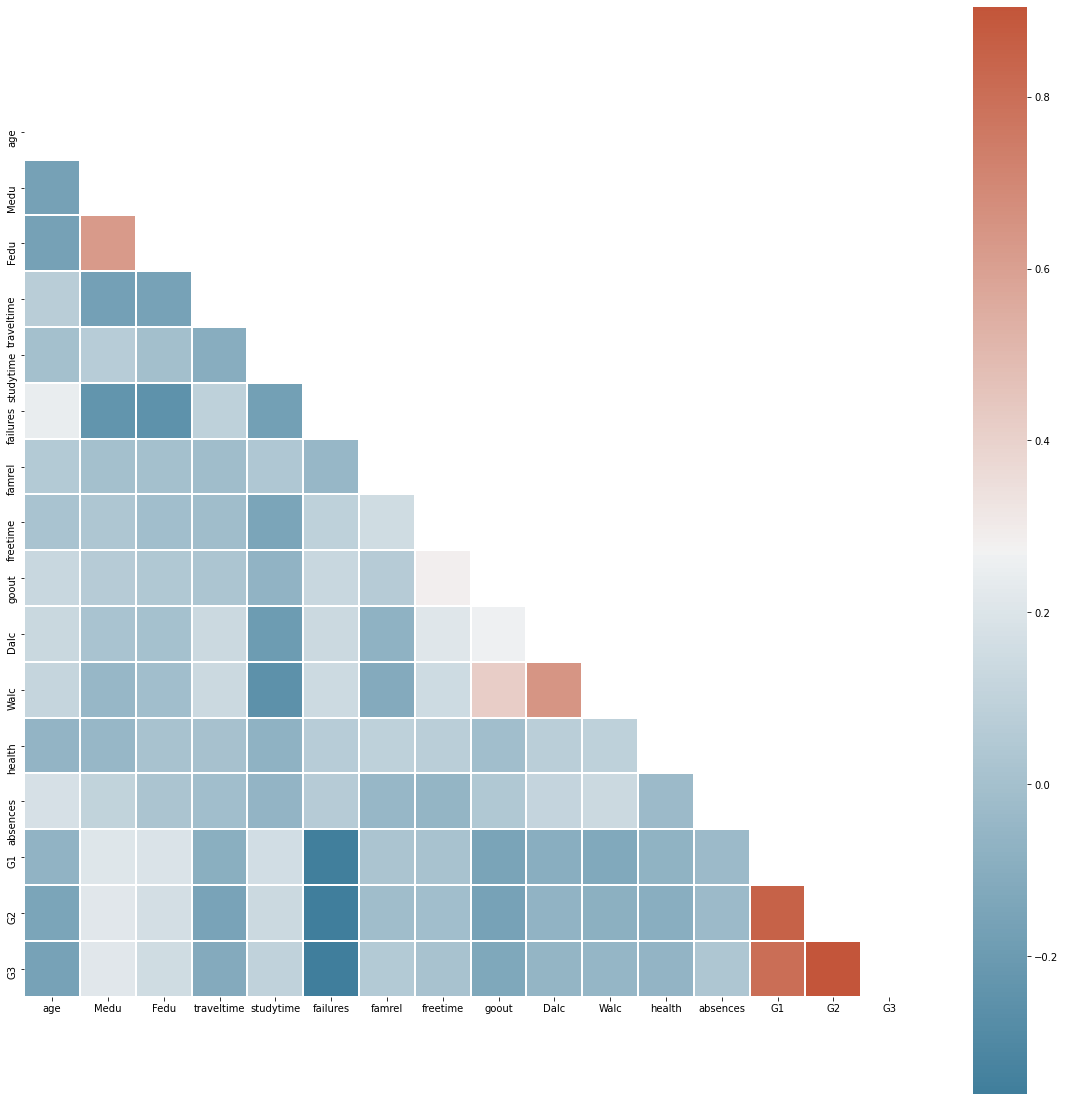

In [31]:
corrMat = data.corr()

fig, ax = plt.subplots(figsize = (20,20))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
mask = np.triu(np.ones_like(corrMat, dtype = bool))
sns.heatmap(corrMat, square = True, annot = False, linewidths = 1, cmap = cmap, mask = mask)

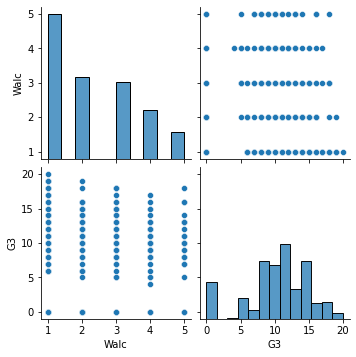

In [89]:
sns.pairplot(data[['Walc', 'G3']])

In [34]:
missing_val_cols = data.isnull().sum().sort_values(ascending = False)
print(missing_val_cols)

G3            0
schoolsup     0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
famsup        0
G2            0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
school        0
dtype: int64


In [35]:
from sklearn.preprocessing import OrdinalEncoder

In [51]:
ordinal_encoder = OrdinalEncoder()
X_labeled = data.copy()
X_labeled[categorial_cols] = ordinal_encoder.fit_transform(data[categorial_cols])
X_labeled.drop('G3', axis=1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0.0,0.0,18,1.0,0.0,0.0,4,4,0.0,4.0,0.0,1.0,2,2,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4,3,4,1,1,3,6,5,6
1,0.0,0.0,17,1.0,0.0,1.0,1,1,0.0,2.0,0.0,0.0,1,2,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,5,3,3,1,1,3,4,5,5
2,0.0,0.0,15,1.0,1.0,1.0,1,1,0.0,2.0,2.0,1.0,1,2,3,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,4,3,2,2,3,3,10,7,8
3,0.0,0.0,15,1.0,0.0,1.0,4,2,1.0,3.0,1.0,1.0,1,3,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3,2,2,1,1,5,2,15,14
4,0.0,0.0,16,1.0,0.0,1.0,3,3,2.0,2.0,1.0,0.0,1,2,0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,4,3,2,1,2,5,4,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.0,1.0,20,1.0,1.0,0.0,2,2,3.0,3.0,0.0,2.0,1,2,2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,5,5,4,4,5,4,11,9,9
391,1.0,1.0,17,1.0,1.0,1.0,3,1,3.0,3.0,0.0,1.0,2,1,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2,4,5,3,4,2,3,14,16
392,1.0,1.0,21,0.0,0.0,1.0,1,1,2.0,2.0,0.0,2.0,1,1,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5,5,3,3,3,3,3,10,8
393,1.0,1.0,18,0.0,1.0,1.0,3,2,3.0,2.0,0.0,1.0,3,1,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4,4,1,3,4,5,0,11,12


In [76]:
X_test_labeled = test.copy()
X_test_labeled[cat_cols_test] = ordinal_encoder.fit_transform(test[cat_cols_test])
X_test_labeled.drop('G3', axis=1, inplace=True)

In [39]:
X_labeled.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.0,0.0,18,1.0,0.0,0.0,4,4,0.0,4.0,0.0,1.0,2,2,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4,3,4,1,1,3,6,5,6,6
1,0.0,0.0,17,1.0,0.0,1.0,1,1,0.0,2.0,0.0,0.0,1,2,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,5,3,3,1,1,3,4,5,5,6
2,0.0,0.0,15,1.0,1.0,1.0,1,1,0.0,2.0,2.0,1.0,1,2,3,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,4,3,2,2,3,3,10,7,8,10
3,0.0,0.0,15,1.0,0.0,1.0,4,2,1.0,3.0,1.0,1.0,1,3,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3,2,2,1,1,5,2,15,14,15
4,0.0,0.0,16,1.0,0.0,1.0,3,3,2.0,2.0,1.0,0.0,1,2,0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,4,3,2,1,2,5,4,6,10,10


In [91]:
X = X_train_final.copy()
discrete_features = X.dtypes == int
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]

G2            1.370513
failures      0.104755
internet      0.049869
Medu          0.032667
Pstatus       0.019264
famrel        0.011611
famsup        0.000000
guardian      0.000000
activities    0.000000
freetime      0.000000
sex           0.000000
Name: MI Scores, dtype: float64

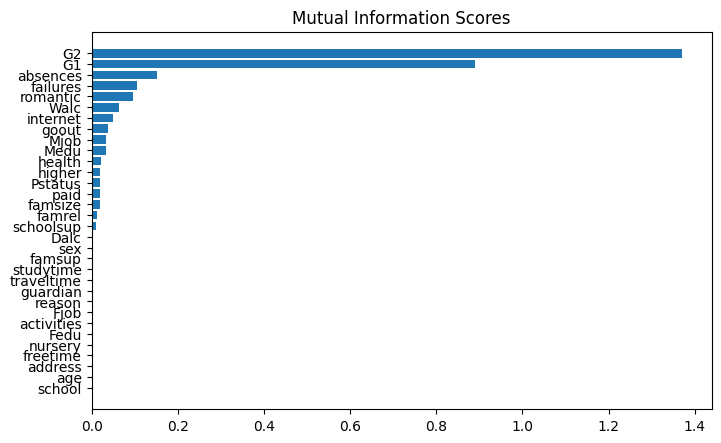

In [92]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [40]:
from sklearn.preprocessing import RobustScaler, StandardScaler

robust_scaler = RobustScaler()
robust_scaler.fit(X_labeled)
X_train_robust = robust_scaler.transform(X_labeled)

standard_scaler = StandardScaler()
standard_scaler.fit(X_train_robust)
X_train_scaled = standard_scaler.transform(X_train_robust)

In [68]:
X_train_final = pd.DataFrame(X_labeled, index = data.index,
                            columns = data.columns)

In [72]:
X_train_final.drop('G3', axis=1, inplace=True)

In [83]:
y_test_hat.shape, y_test.shape

((649,), (98,))

In [86]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train_final, y)
y_test_hat = clf.predict(X_test_labeled)

from sklearn.metrics import median_absolute_error
median_absolute_error(y_test_hat, y_test)

0.9184083303350477

In [80]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=4)

scores = []
for train_index, test_index in kf.split(X_train_final):
    X_train, X_test = X_train_final.iloc()[train_index], X_train_final.iloc()[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    scores.append(
        median_absolute_error(clf.fit(X_train, y_train).predict(X_test), y_test)
    )
    
np.mean(scores)

0.8726983653901381

In [87]:
from sklearn.model_selection import RepeatedKFold
X = X_train_final.copy()
rkf = RepeatedKFold(n_splits=4, n_repeats=2)

scores = []
for train_index, test_index in rkf.split(X):
    X_train, X_test = X.iloc()[train_index], X.iloc()[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    scores.append(
        median_absolute_error(clf.fit(X_train, y_train).predict(X_test), y_test)
    )
    
np.mean(scores)

0.8866411330378379

In [62]:
np.array(y)

array([ 6,  6, 10, 15, 10, 15, 11,  6, 19, 15,  9, 12, 14, 11, 16, 14, 14,
       10,  5, 10, 15, 15, 16, 12,  8,  8, 11, 15, 11, 11, 12, 17, 16, 12,
       15,  6, 18, 15, 11, 13, 11, 12, 18, 11,  9,  6, 11, 20, 14,  7, 13,
       13, 10, 11, 13, 10, 15, 15,  9, 16, 11, 11,  9,  9, 10, 15, 12,  6,
        8, 16, 15, 10,  5, 14, 11, 10, 10, 11, 10,  5, 12, 11,  6, 15, 10,
        8,  6, 14, 10,  7,  8, 18,  6, 10, 14, 10, 15, 10, 14,  8,  5, 17,
       14,  6, 18, 11,  8, 18, 13, 16, 19, 10, 13, 19,  9, 16, 14, 13,  8,
       13, 15, 15, 13, 13,  8, 12, 11,  9,  0, 18,  0,  0, 12, 11,  0,  0,
        0,  0, 12, 15,  0,  9, 11, 13,  0, 11,  0, 11,  0, 10,  0, 14, 10,
        0, 12,  8, 13, 10, 15, 12,  0,  7,  0, 10,  7, 12, 10, 16,  0, 14,
        0, 16, 10,  0,  9,  9, 11,  6,  9, 11,  8, 12, 17,  8, 12, 11, 11,
       15,  9, 10, 13,  9,  8, 10, 14, 15, 16, 10, 18, 10, 16, 10, 10,  6,
       11,  9,  7, 13, 10,  7,  8, 13, 14,  8, 10, 15,  4,  8,  8, 10,  6,
        0, 17, 13, 14,  7

In [74]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_final, np.array(y))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
np.array(y_test)

array([15,  9, 11, 16, 12,  8, 11, 17, 12, 18, 11, 11,  6, 16, 11,  9, 15,
       10, 11, 10, 10,  6, 10,  7, 18, 19, 19, 13, 13, 13, 12,  0, 12,  0,
       10, 14,  7, 10, 10,  9,  9, 17, 12, 13,  9,  8, 10, 15, 18,  6, 13,
       10, 13, 14,  4,  8, 10,  6,  7, 11, 13, 12,  8, 12, 10, 11,  9, 10,
        8, 11, 11, 19, 15,  0,  8, 10, 14, 12,  8, 11, 11, 13, 15,  0,  0,
       15,  9,  8,  9, 11, 16,  0,  5, 19, 10,  0, 16,  7])

In [73]:
X_train_final[:10]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0.0,0.0,18,1.0,0.0,0.0,4,4,0.0,4.0,0.0,1.0,2,2,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4,3,4,1,1,3,6,5,6
1,0.0,0.0,17,1.0,0.0,1.0,1,1,0.0,2.0,0.0,0.0,1,2,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,5,3,3,1,1,3,4,5,5
2,0.0,0.0,15,1.0,1.0,1.0,1,1,0.0,2.0,2.0,1.0,1,2,3,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,4,3,2,2,3,3,10,7,8
3,0.0,0.0,15,1.0,0.0,1.0,4,2,1.0,3.0,1.0,1.0,1,3,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3,2,2,1,1,5,2,15,14
4,0.0,0.0,16,1.0,0.0,1.0,3,3,2.0,2.0,1.0,0.0,1,2,0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,4,3,2,1,2,5,4,6,10
5,0.0,1.0,16,1.0,1.0,1.0,4,3,3.0,2.0,3.0,1.0,1,2,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,5,4,2,1,2,5,10,15,15
6,0.0,1.0,16,1.0,1.0,1.0,2,2,2.0,2.0,1.0,1.0,1,2,0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,4,4,4,1,1,3,0,12,12
7,0.0,0.0,17,1.0,0.0,0.0,4,4,2.0,4.0,1.0,1.0,2,2,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,4,1,4,1,1,1,6,6,5
8,0.0,1.0,15,1.0,1.0,0.0,3,2,3.0,2.0,1.0,1.0,1,2,0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,4,2,2,1,1,1,0,16,18
9,0.0,1.0,15,1.0,0.0,1.0,3,4,2.0,2.0,1.0,1.0,1,2,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,5,5,1,1,1,5,0,14,15


In [77]:
reg.predict(X_test_labeled)

array([ 8.65468206, 10.36365044, 13.57143644, 13.19515516, 12.79438175,
       12.67868625, 11.91260559, 12.59401747, 16.4729366 , 12.01785287,
       14.25355518, 11.72013928, 12.89370163, 12.74789248, 14.19439258,
       17.88907395, 12.47379692, 14.88558898,  7.19703434, 11.69907685,
       12.94292558, 12.55943615, 12.98285518, 10.38149431, 10.47682148,
       10.13722614, 12.47667171, 10.4379208 , 12.60579839, 10.44001463,
       11.46031678, 15.36981035, 13.95216271, 12.06768336, 12.95764105,
       10.60123411, 14.34100778, 11.9796148 , 11.75142095, 13.89471628,
       10.71771068, 12.0932858 , 14.62743061, 10.05255579, 10.99711221,
       11.22617616, 12.00411475, 16.82435744, 12.5917884 , 12.30897036,
       13.25917279, 14.97439266, 10.49035445, 12.43041719, 12.43400588,
       12.52718408, 14.093896  , 15.60427747, 13.5869699 , 15.68568788,
       15.63230099, 10.1989547 , 12.49012393, 13.37997295, 12.17708685,
       15.61828398, 10.2422066 ,  9.15592374, 10.6355489 , 16.13